<a href="https://colab.research.google.com/github/chithrajneesh/Portfolio_Project/blob/main/Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
import warnings  as ws
ws.filterwarnings("ignore")

import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingRegressor
#from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, SGDRegressor, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score

from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import PartialDependenceDisplay
import shap

# print the JS visualization code to the notebook
shap.initjs()

In [31]:
df = pd.read_csv("insurance.csv")

In [32]:
df.shape

(986, 11)

In [33]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [34]:
org_data=df.copy()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [36]:
df.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [37]:
df.duplicated().sum()

0

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.000,41.745,13.963,18.000,30.000,42.000,53.000,66.000
Diabetes,986.000,0.420,0.494,0.000,0.000,0.000,1.000,1.000
BloodPressureProblems,986.000,0.469,0.499,0.000,0.000,0.000,1.000,1.000
AnyTransplants,986.000,0.056,0.230,0.000,0.000,0.000,0.000,1.000
AnyChronicDiseases,986.000,0.181,0.385,0.000,0.000,0.000,0.000,1.000
Height,986.000,168.183,10.098,145.000,161.000,168.000,176.000,188.000
Weight,986.000,76.950,14.265,51.000,67.000,75.000,87.000,132.000
KnownAllergies,986.000,0.215,0.411,0.000,0.000,0.000,0.000,1.000
HistoryOfCancerInFamily,986.000,0.118,0.322,0.000,0.000,0.000,0.000,1.000
NumberOfMajorSurgeries,986.000,0.667,0.749,0.000,0.000,1.000,1.000,3.000


In [39]:
cols = df.columns
cols

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

# Exploratory Data Analysis

Dividing Premiums into different categories

In [42]:
pr_lab=['Low','Basic','Average','High','SuperHigh']
df['PremiumLabel']=pr_bins=pd.cut(df['PremiumPrice'],bins=5,labels=pr_lab,precision=0)

Distribution of Premium across different age groups

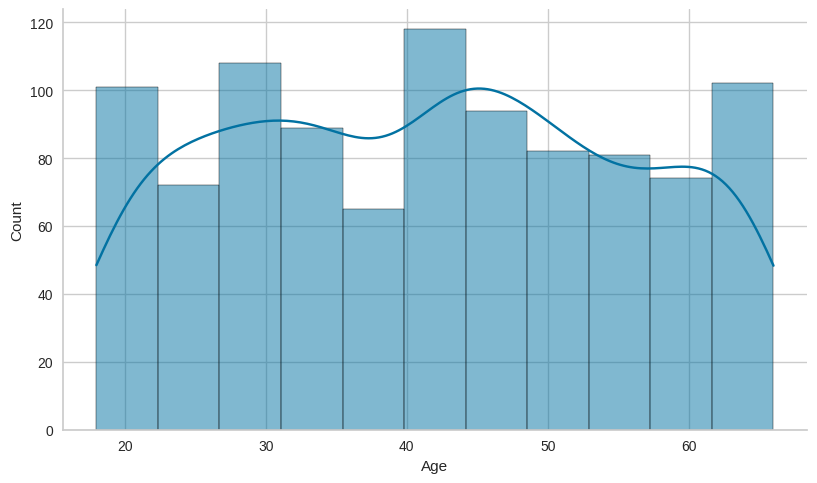

In [19]:
sns.displot(x='Age',data=df,aspect=10/6,kde=True)

**Insurance Premium Price by Age**

Text(0.5, 1.0, 'Insurance Premium Price by Age')

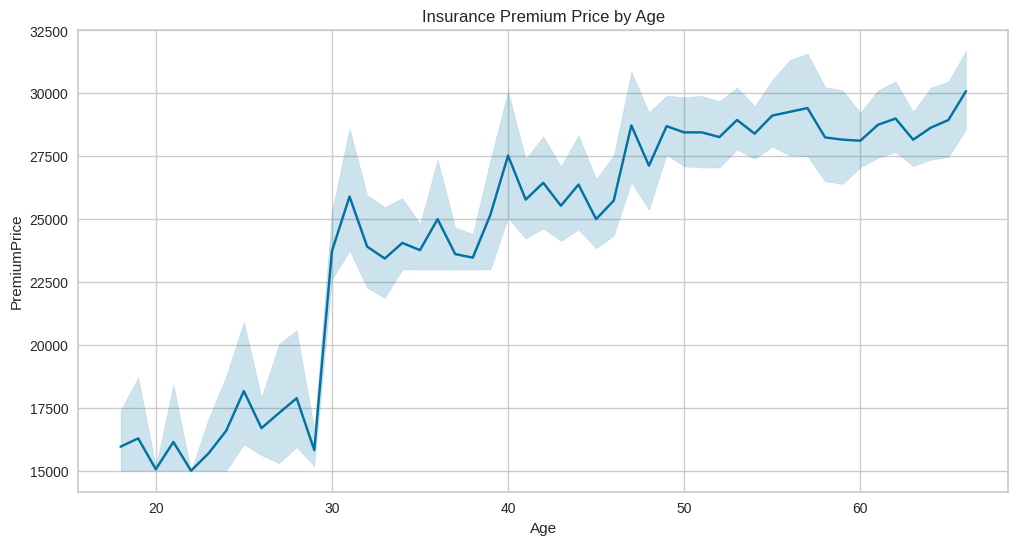

In [20]:
fig,ax=plt.subplots(figsize=(12,6))
sns.lineplot(x=df.Age,y=df.PremiumPrice).set_title('Insurance Premium Price by Age')

**Distribution of the Insurance Premium Price among different Premium categories**

Text(0.5, 1.0, 'Distribution of the Insurance Premium Price')

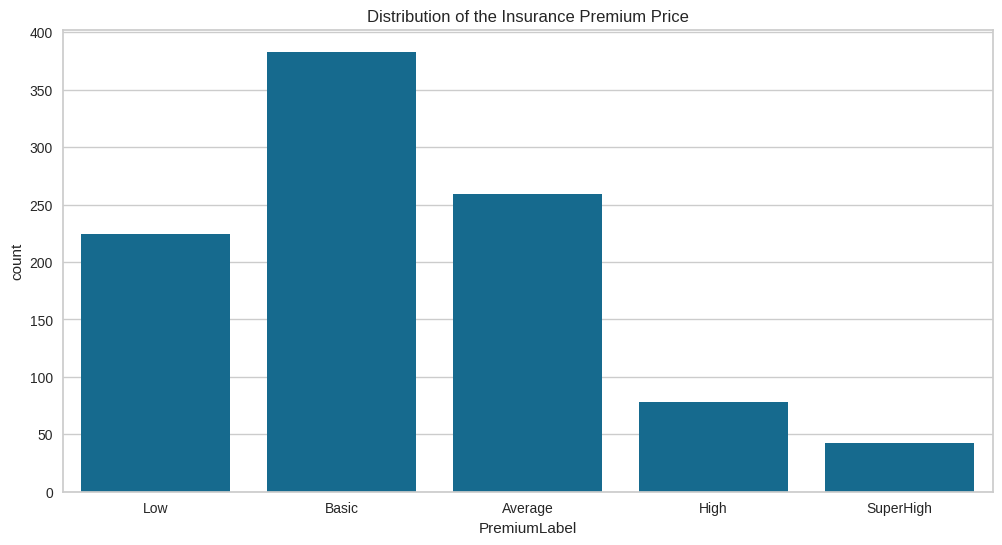

In [21]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel', data=df,ax=ax).set_title('Distribution of the Insurance Premium Price')

**Analysing number of surgeries Vs different Premium Labels**

In [22]:
df.groupby(['PremiumLabel','NumberOfMajorSurgeries'])['NumberOfMajorSurgeries'].count()

PremiumLabel  NumberOfMajorSurgeries
Low           0                         142
              1                          82
              2                           0
              3                           0
Basic         0                         226
              1                         156
              2                           1
              3                           0
Average       0                          67
              1                          59
              2                         117
              3                          16
High          0                          22
              1                          56
              2                           0
              3                           0
SuperHigh     0                          22
              1                          19
              2                           1
              3                           0
Name: NumberOfMajorSurgeries, dtype: int64

**Insurance Premium Price for Diabetic vs Non-Diabetic Patients**

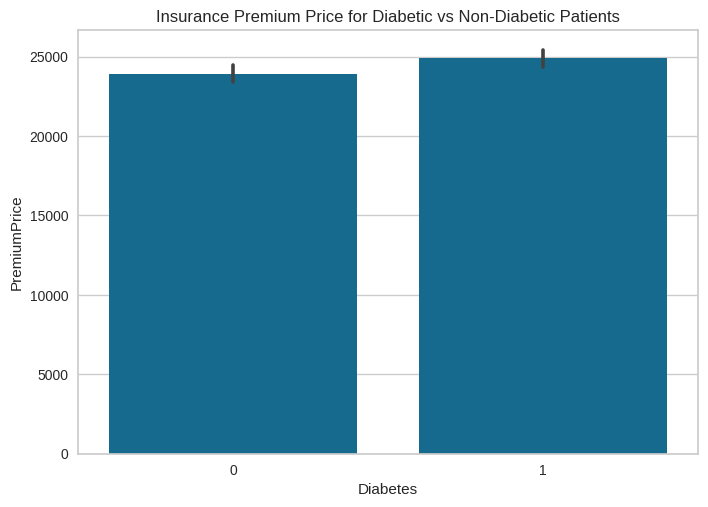

In [23]:
plot = sns.barplot(data=df, x="Diabetes", y= "PremiumPrice" ).set_title('Insurance Premium Price for Diabetic vs Non-Diabetic Patients')

**Density plot for Diabetic vs Non-Diabetic Patients**

Text(0.5, 0.98, 'Density plot for Diabetic vs Non-Diabetic Patients')

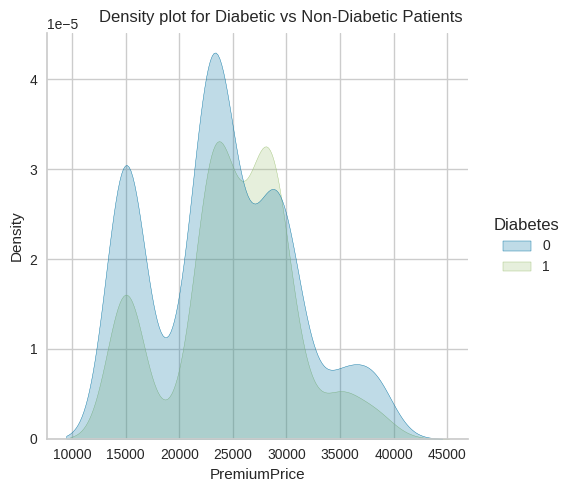

In [6]:
plot= sns.displot(df, x="PremiumPrice", hue="Diabetes", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Diabetic vs Non-Diabetic Patients',
                  fontsize=12, fontdict={"weight": "bold"})

**Insurance Premium Price for Patients with/without Blood Pressure Problems**

Text(0.5, 0.98, 'Density plot for Patients with/without Blood Pressure Problems')

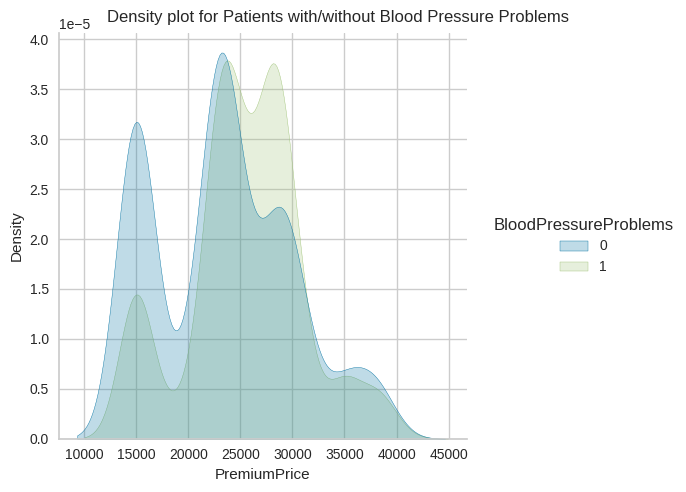

In [7]:
plot= sns.displot(df, x="PremiumPrice", hue="BloodPressureProblems", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Blood Pressure Problems',
                  fontsize=12, fontdict={"weight": "bold"})

**Insurance Premium Price for Patients with/without Any Transplants**

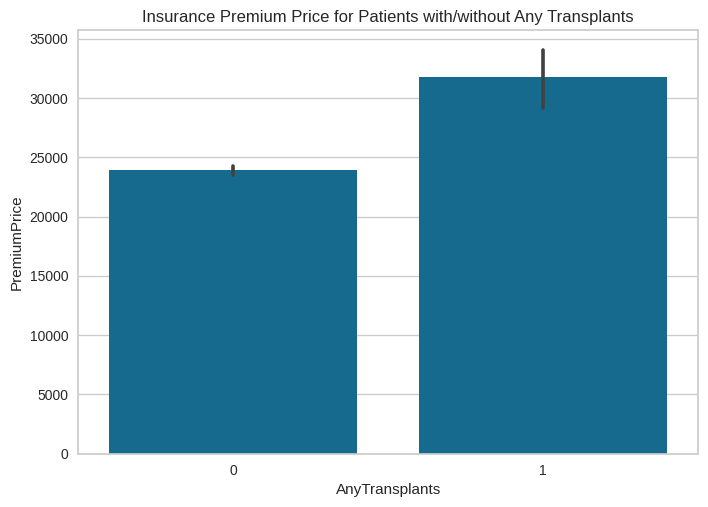

In [8]:
plot = sns.barplot(data=df, x="AnyTransplants", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any Transplants')

**Density plot for Patients with/without Any Transplants**

Text(0.5, 0.98, 'Density plot for Patients with/without Any Transplants')

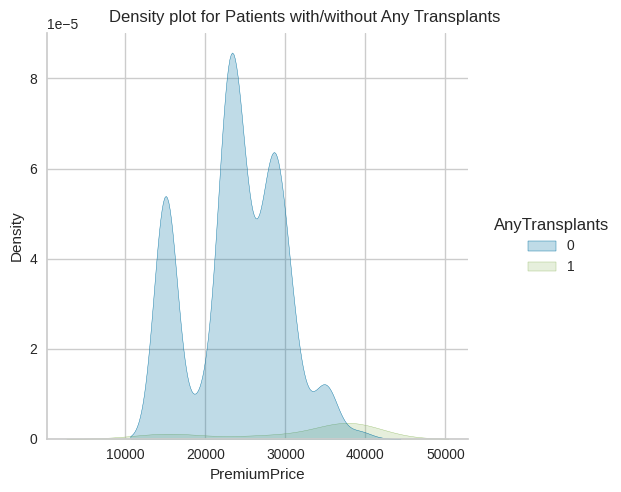

In [9]:
plot= sns.displot(df, x="PremiumPrice", hue="AnyTransplants", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any Transplants',
                  fontsize=12, fontdict={"weight": "bold"})

**Insurance Premium Price for Patients with/without Any Chronic Diseases**

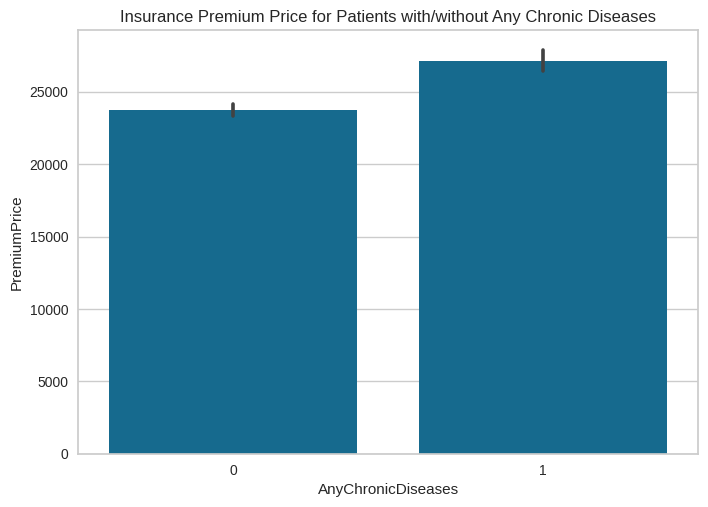

In [10]:
plot = sns.barplot(data=df, x="AnyChronicDiseases", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any Chronic Diseases')

**Density plot for Patients with/without Any Chronic Diseases**

Text(0.5, 0.98, 'Density plot for Patients with/without Any Chronic Diseases')

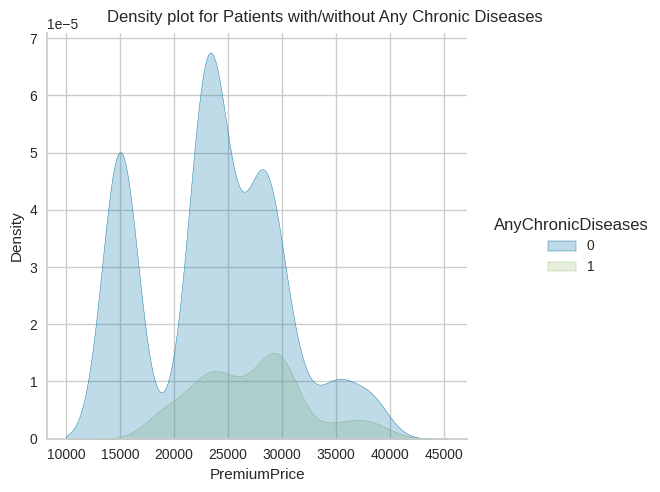

In [11]:
plot= sns.displot(df, x="PremiumPrice", hue="AnyChronicDiseases", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any Chronic Diseases',
                  fontsize=12, fontdict={"weight": "bold"})

**Insurance Premium Price for Patients with/without Any Known Allergies**

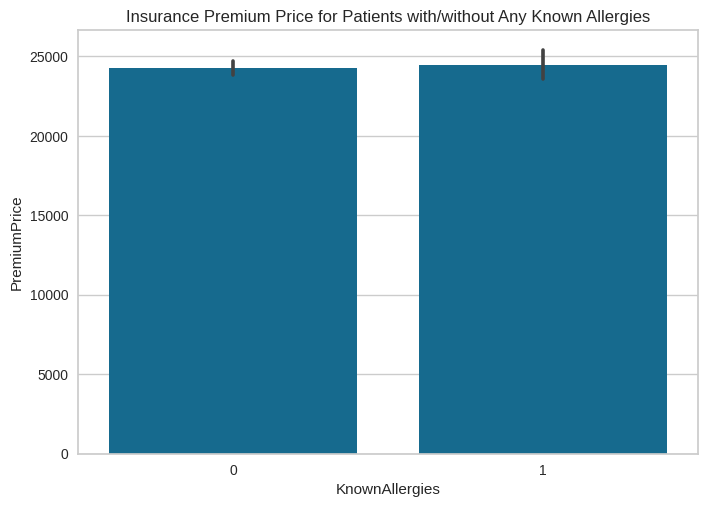

In [12]:
plot = sns.barplot(data=df, x="KnownAllergies", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any Known Allergies')

**Density plot for Patients with/without Any Known Allergies**

Text(0.5, 0.98, 'Density plot for Patients with/without Any Known Allergies')

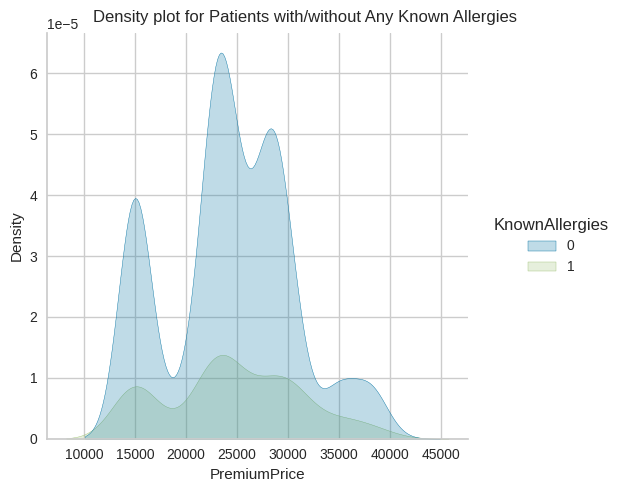

In [13]:
plot= sns.displot(df, x="PremiumPrice", hue="KnownAllergies", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any Known Allergies',
                  fontsize=12, fontdict={"weight": "bold"})

**Insurance Premium Price for Patients with/without Any History Of Cancer In the Family**

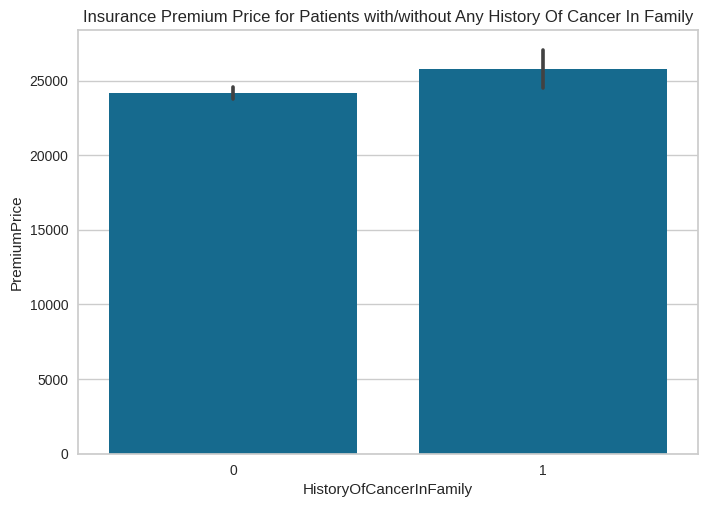

In [14]:
plot = sns.barplot(data=df, x="HistoryOfCancerInFamily", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any History Of Cancer In Family')

**Density plot for Patients with/without Any History Of Cancer In Family**

Text(0.5, 0.98, 'Density plot for Patients with/without Any History Of Cancer In Family')

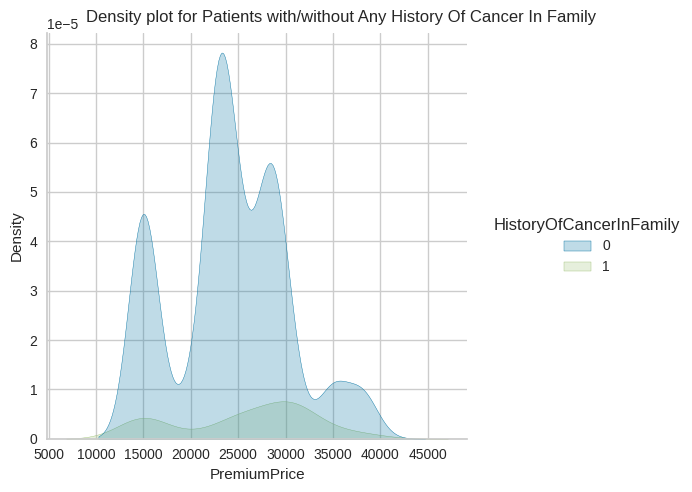

In [15]:
plot= sns.displot(df, x="PremiumPrice", hue="HistoryOfCancerInFamily", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any History Of Cancer In Family',
                  fontsize=12, fontdict={"weight": "bold"})

**Density plot for Number Of Major Surgeries by Patients**

Text(0.5, 0.98, 'Density plot for Number Of Major Surgeries by Patients')

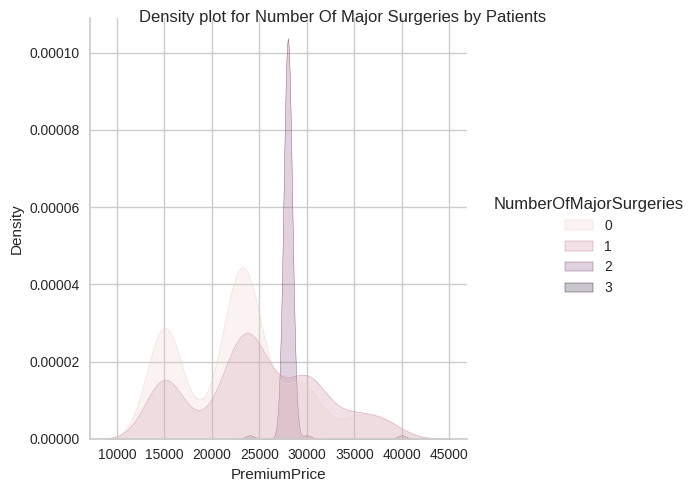

In [16]:
plot= sns.displot(df, x="PremiumPrice", hue="NumberOfMajorSurgeries", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Number Of Major Surgeries by Patients',
                  fontsize=12, fontdict={"weight": "bold"})

In [43]:
# Calculating BMI
w = df['Weight'];
h = df['Height'];

#bmi = 10000*(weight/(height*height));

df['BMI'] = 10000*(w/(h*h))

df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,23.725
1,60,1,0,0,0,180,73,0,0,0,29000,Average,22.531
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,23.634
3,52,1,1,0,1,183,93,0,0,2,28000,Average,27.770
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,31.935


In [44]:
df['BMI_Status'] = np.select(
    [df['BMI'] < 18.499999,
     df['BMI'] >= 30,
     df['BMI'].between(18.5, 24.999999),
     df['BMI'].between(25, 29.9999999)],
    ['Under Weight', 'Obese', 'Normal', 'Over Weight']
)

In [45]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,BMI,BMI_Status
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,23.725,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,Average,22.531,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,23.634,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,Average,27.770,Over Weight
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,31.935,Obese


In [26]:
df.groupby(['PremiumLabel','BMI_Status'])['BMI_Status'].count()

PremiumLabel  BMI_Status  
Low           Normal           71
              Obese            70
              Over Weight      74
              Under Weight      9
Basic         Normal          151
              Obese            88
              Over Weight     120
              Under Weight     24
Average       Normal           74
              Obese            80
              Over Weight     100
              Under Weight      5
High          Normal           13
              Obese            49
              Over Weight      15
              Under Weight      1
SuperHigh     Normal           10
              Obese            16
              Over Weight      16
              Under Weight      0
Name: BMI_Status, dtype: int64

<Axes: xlabel='PremiumLabel', ylabel='count'>

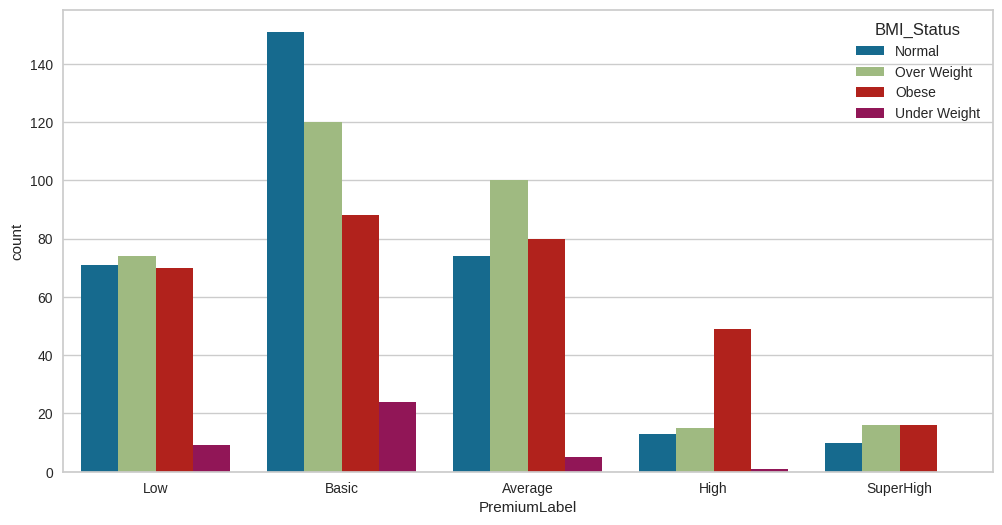

In [27]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel',hue='BMI_Status', data=df,ax=ax)

Text(0.5, 1.0, 'Insurance Premium Price for Various BMI Status')

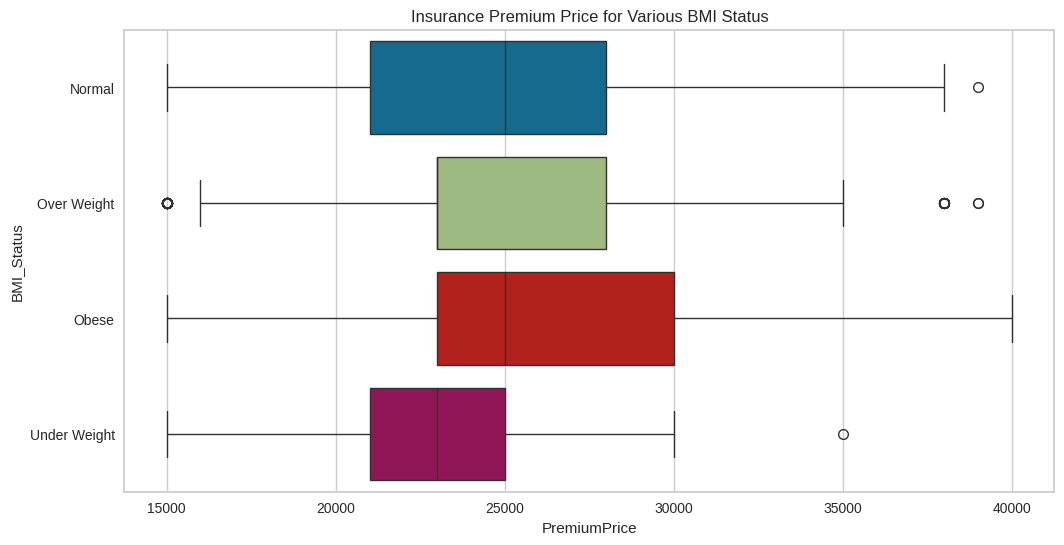

In [28]:
fig,ax=plt.subplots(figsize=(12,6))
sns.boxplot(data=df, x="PremiumPrice", y="BMI_Status", hue="BMI_Status", dodge=False).set_title('Insurance Premium Price for Various BMI Status')

<Axes: >

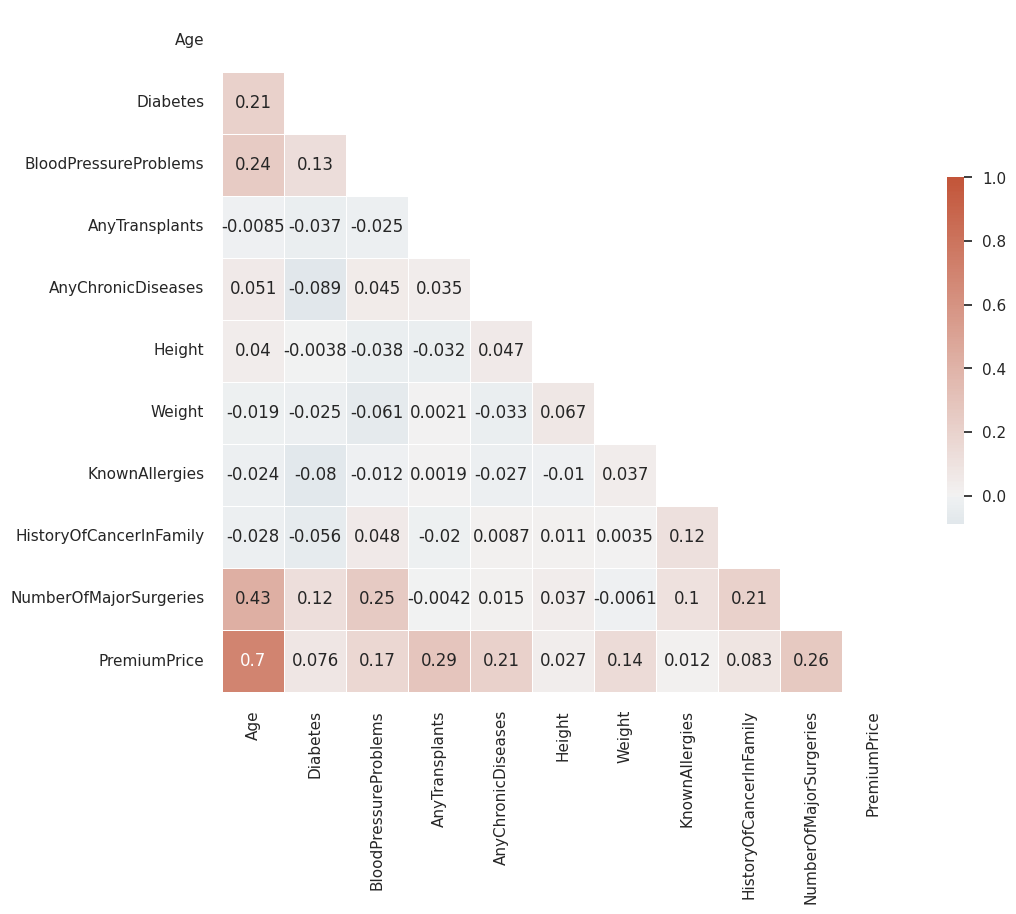

In [40]:
from string import ascii_letters
sns.set_theme(style="white")

# Generate a large random dataset
rs = df
d = pd.DataFrame(data=rs,
                 columns=cols)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [46]:
df=pd.get_dummies(data=df,columns=['BMI_Status'])

In [47]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,BMI,BMI_Status_Normal,BMI_Status_Obese,BMI_Status_Over Weight,BMI_Status_Under Weight
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,23.725,True,False,False,False
1,60,1,0,0,0,180,73,0,0,0,29000,Average,22.531,True,False,False,False
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,23.634,True,False,False,False
3,52,1,1,0,1,183,93,0,0,2,28000,Average,27.770,False,False,True,False
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,31.935,False,True,False,False


In [48]:
df.shape

(986, 17)

In [49]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'PremiumLabel', 'BMI', 'BMI_Status_Normal', 'BMI_Status_Obese',
       'BMI_Status_Over Weight', 'BMI_Status_Under Weight'],
      dtype='object')

# Outlier Detection

<Axes: xlabel='BMI'>

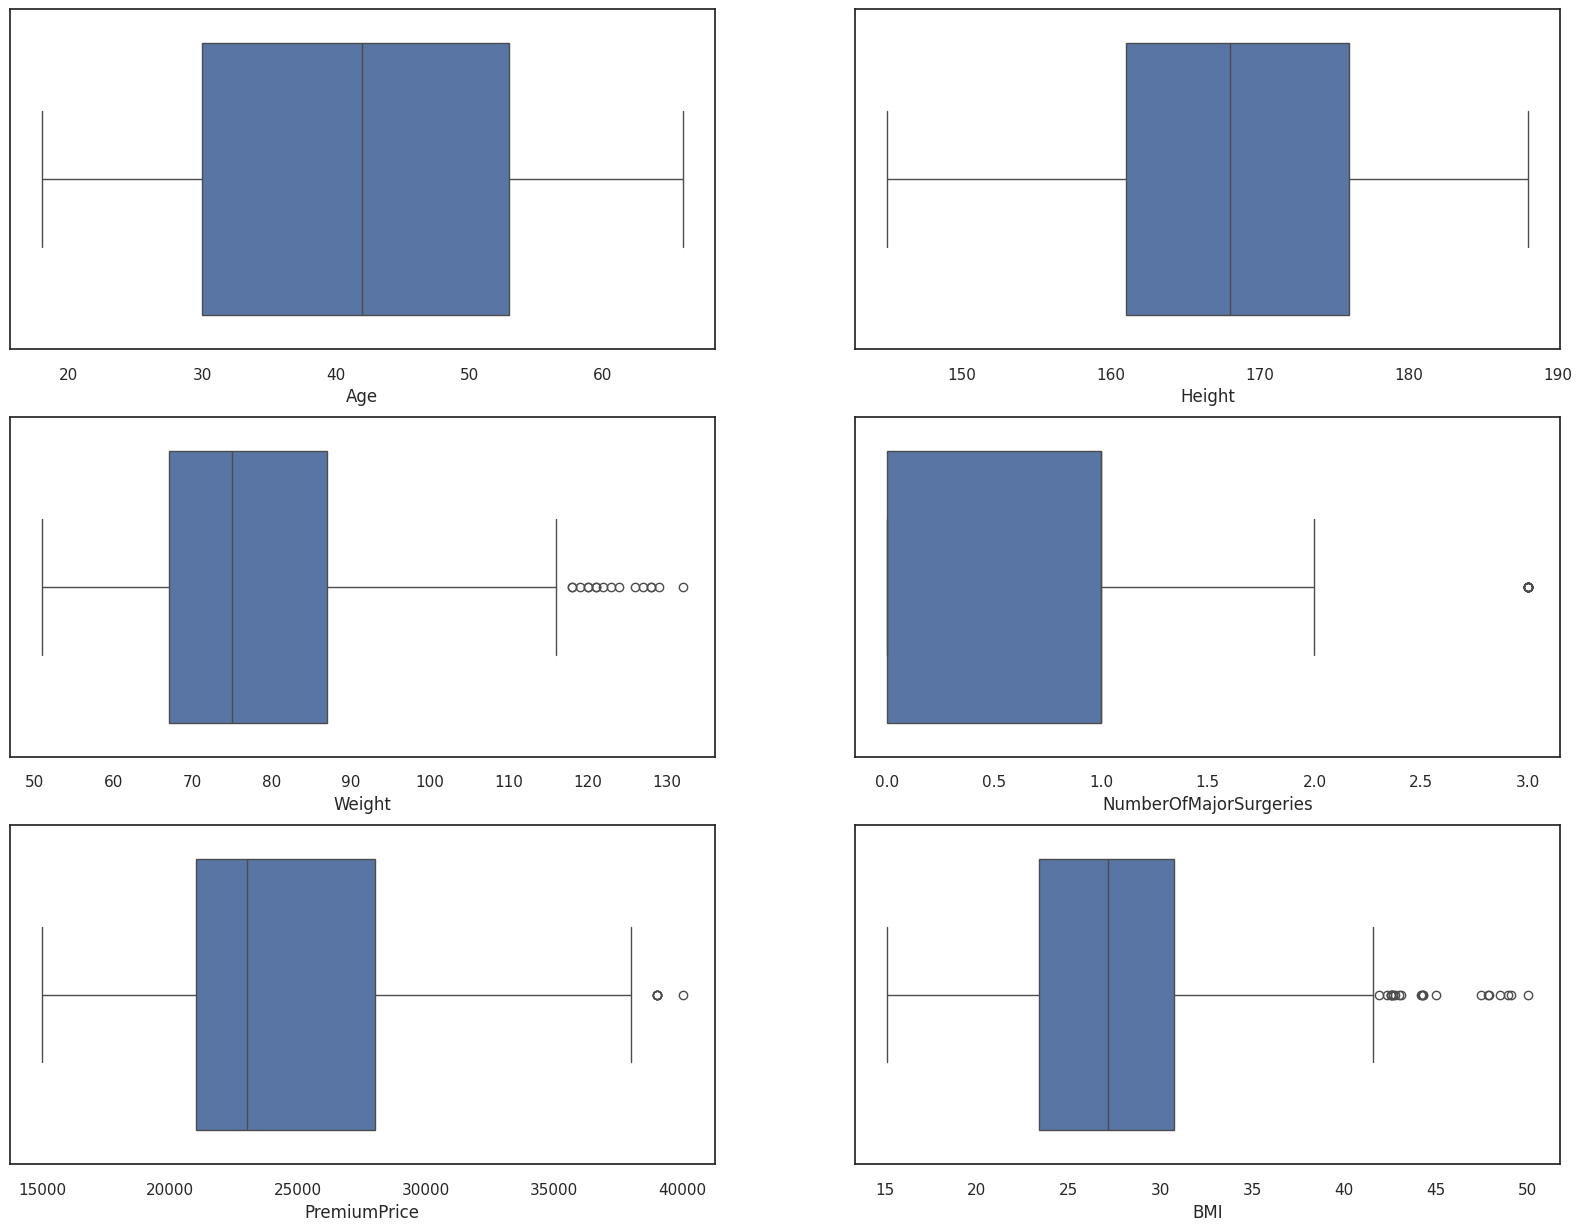

In [52]:
fig, ax = plt.subplots(3,2, figsize = (20,15))
sns.boxplot(ax =ax[0,0], data = df , x = 'Age')
sns.boxplot(ax =ax[0,1], data = df , x = "Height")
sns.boxplot(ax =ax[1,0], data = df , x = "Weight")
sns.boxplot(ax =ax[1,1], data = df , x = "NumberOfMajorSurgeries")
sns.boxplot(ax =ax[2,0], data = df , x = "PremiumPrice")
sns.boxplot(ax =ax[2,1], data = df , x = 'BMI')
#cols = [i for i  in df.columns if i not in binary_feature]
#cols

We have a situation with outliers in our dataset, but due to the limited data available, we cannot afford to drop any samples. Since these outliers, such as 'NumberOfMajorSurgeries,' provide important information despite being few in number, we will retain them. To handle this effectively, we will use ensemble models, which are robust to outliers.

# Hypothesis Testing

**T-tests for Binary Categorical Variables**

In [53]:
import pandas as pd
from scipy.stats import ttest_ind

# List of binary categorical variables
binary_vars = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
               'KnownAllergies', 'HistoryOfCancerInFamily', 'BMI_Status_Normal',
               'BMI_Status_Obese', 'BMI_Status_Over Weight', 'BMI_Status_Under Weight']

# Perform T-tests
for var in binary_vars:
    group1 = df[df[var] == 0]['PremiumPrice']
    group2 = df[df[var] == 1]['PremiumPrice']
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Welch's T-test
    print(f"T-test for {var}: t-statistic = {t_stat}, p-value = {p_val}")


T-test for Diabetes: t-statistic = -2.4489285982890396, p-value = 0.014508142994631809
T-test for BloodPressureProblems: t-statistic = -5.370281271166068, p-value = 9.813498313247295e-08
T-test for AnyTransplants: t-statistic = -6.2599390386040215, p-value = 5.544902737541748e-08
T-test for AnyChronicDiseases: t-statistic = -7.707663368460665, p-value = 1.7279736467737666e-13
T-test for KnownAllergies: t-statistic = -0.36668963110854214, p-value = 0.7140924633237387
T-test for HistoryOfCancerInFamily: t-statistic = -2.3567519547641984, p-value = 0.01982822652964323
T-test for BMI_Status_Normal: t-statistic = 2.2910631227890796, p-value = 0.022249611189325096
T-test for BMI_Status_Obese: t-statistic = -2.822569223335916, p-value = 0.0049542075503375416
T-test for BMI_Status_Over Weight: t-statistic = 0.08118817184725263, p-value = 0.935316990237654
T-test for BMI_Status_Under Weight: t-statistic = 2.093376472841135, p-value = 0.04224368281912483


**Interpretation of T-test Results**

**Diabetes:**

t-statistic: -2.4489
p-value: 0.0145
Interpretation: There is a significant difference in premium prices between individuals with and without diabetes (p < 0.05). The negative t-statistic indicates that individuals with diabetes tend to have higher premiums.

**BloodPressureProblems:**

t-statistic: -5.3703
p-value: 9.8135e-08
Interpretation: There is a significant difference in premium prices between individuals with and without blood pressure problems (p < 0.05). The negative t-statistic suggests higher premiums for those with blood pressure problems.

**AnyTransplants:**

t-statistic: -6.2599
p-value: 5.5449e-08
Interpretation: There is a significant difference in premium prices between individuals with and without transplants (p < 0.05). The negative t-statistic indicates higher premiums for individuals who have had transplants.

**AnyChronicDiseases:**

t-statistic: -7.7077
p-value: 1.7280e-13
Interpretation: There is a significant difference in premium prices between individuals with and without chronic diseases (p < 0.05). The negative t-statistic shows higher premiums for those with chronic diseases.

**KnownAllergies:**

t-statistic: -0.3667
p-value: 0.7141
Interpretation: There is no significant difference in premium prices between individuals with and without known allergies (p > 0.05).

**HistoryOfCancerInFamily:**

t-statistic: -2.3568
p-value: 0.0198
Interpretation: There is a significant difference in premium prices between individuals with and without a history of cancer in the family (p < 0.05). The negative t-statistic indicates higher premiums for those with a family history of cancer.

**BMI_Status_Normal:**

t-statistic: 2.2911
p-value: 0.0222
Interpretation: There is a significant difference in premium prices between individuals with a normal BMI and those without (p < 0.05). The positive t-statistic suggests lower premiums for those with a normal BMI.

**BMI_Status_Obese:**

t-statistic: -2.8226
p-value: 0.0050
Interpretation: There is a significant difference in premium prices between individuals who are obese and those who are not (p < 0.05). The negative t-statistic indicates higher premiums for obese individuals.

**BMI_Status_Over Weight:**

t-statistic: 0.0812
p-value: 0.9353
Interpretation: There is no significant difference in premium prices between individuals who are overweight and those who are not (p > 0.05).

**BMI_Status_Under Weight:**

t-statistic: 2.0934
p-value: 0.0422
Interpretation: There is a significant difference in premium prices between individuals who are underweight and those who are not (p < 0.05). The positive t-statistic suggests lower premiums for underweight individuals.


**Summary**

**Significant Differences**: There are significant differences in premium prices for variables: Diabetes, BloodPressureProblems, AnyTransplants, AnyChronicDiseases, HistoryOfCancerInFamily, BMI_Status_Normal, BMI_Status_Obese, and BMI_Status_Under Weight. This indicates that these factors influence premium pricing.

**No Significant Differences**: There are no significant differences in premium prices for KnownAllergies and BMI_Status_Over Weight, suggesting these factors do not significantly impact premium pricing.

This analysis highlights which health conditions and BMI statuses significantly impact insurance premium prices, which can help insurance companies tailor their pricing strategies based on individual health profiles.

**ANOVA for Categorical Variables with More Than Two Groups**

Number Of Major Surgeries Vs Premium Label

In [58]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# List of categorical variables with more than two groups
categorical_vars = ['NumberOfMajorSurgeries', 'PremiumLabel']

# Perform ANOVA
for var in categorical_vars:
    formula = f'PremiumPrice ~ C({var})'
    model = ols(formula, data=df).fit()
    anova_table = anova_lm(model)
    print(f"ANOVA for {var}:")
    print(anova_table)


ANOVA for NumberOfMajorSurgeries:
                               df          sum_sq       mean_sq      F  PR(>F)
C(NumberOfMajorSurgeries)   3.000  2843295211.631 947765070.544 26.135   0.000
Residual                  982.000 35610915741.716  36263661.651    NaN     NaN
ANOVA for PremiumLabel:
                     df          sum_sq        mean_sq        F  PR(>F)
C(PremiumLabel)   4.000 37225757250.885 9306439312.721 7431.796   0.000
Residual        981.000  1228453702.462    1252246.384      NaN     NaN


**Interpretation of the ANOVA Test Result**

**ANOVA for NumberOfMajorSurgeries**

**df (Degrees of Freedom)**:

C(NumberOfMajorSurgeries): 3 (indicating 4 groups of NumberOfMajorSurgeries since df = number of groups - 1)
Residual: 982

**sum_sq (Sum of Squares)**:

C(NumberOfMajorSurgeries): 2,843,295,211.631
Residual: 35,610,915,741.716

**mean_sq (Mean Squares)**:

C(NumberOfMajorSurgeries): 947,765,070.544
Residual: 36,263,661.651

F-value: 26.135
PR(>F) (p-value): 0.000

**Interpretation:**

F-value: The F-value of 26.135 is relatively large, indicating that there is a significant difference in the means of premium prices across the different groups defined by NumberOfMajorSurgeries.

p-value (PR(>F)): The p-value is 0.000, which is less than the common significance level (e.g., 0.05). This indicates that the differences in premium prices among the groups defined by NumberOfMajorSurgeries are statistically significant.

**Chi-square tests to evaluate the association between two categorical variables**

Any Chronic Diseases Vs History Of Cancer In Family

In [59]:
import pandas as pd
import scipy.stats as stats

# Prepare the data by creating a contingency table
contingency_table = pd.crosstab(df['AnyChronicDiseases'], df['HistoryOfCancerInFamily'])

# Perform Chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display results
print("Chi-square Test Results:")
print(f"Chi-square Statistic: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")


Chi-square Test Results:
Chi-square Statistic: 0.02062393388215223
p-value: 0.8858081638149811
Degrees of Freedom: 1
Expected Frequencies Table:
[[712.94117647  95.05882353]
 [157.05882353  20.94117647]]


**Interpretation**


**Chi-square Statistic**:

The Chi-square statistic of 0.0206 is very small, indicating that the observed frequencies are very close to the expected frequencies under the null hypothesis of independence.

**p-value**:

The p-value of 0.8858 is much higher than the common significance level of 0.05. This suggests that there is no significant association between AnyChronicDiseases and HistoryOfCancerInFamily. In other words, the presence of chronic diseases and a history of cancer in the family are independent of each other in your dataset.

**Degrees of Freedom**:

The degrees of freedom (1) is correct for a Chi-square test involving a 2x2 contingency table.

**Expected Frequencies Table**:

The table shows the expected frequencies for each cell in the contingency table if there were no association between the variables. For instance, if the two variables were independent, we would expect approximately 712.94 instances where both conditions are present, 95.06 instances where AnyChronicDiseases is present and HistoryOfCancerInFamily is not, and so on.

**Conclusion**

Given the high p-value (0.8858), you do not have enough evidence to reject the null hypothesis. This means that, based on the current data, AnyChronicDiseases and HistoryOfCancerInFamily do not appear to be significantly associated with each other.

In practical terms, this suggests that the presence of chronic diseases does not have a significant impact on whether someone has a history of cancer in the family, according to your dataset.

**Chi square test for BMI_Status_Over Weight Vs Diabetes and Blood Pressure Problems**

In [63]:
# Chi-square test for BMI_Status_Over Weight vs Diabetes
contingency_table_overweight_diabetes = pd.crosstab(df['BMI_Status_Over Weight'], df['Diabetes'])
chi2_stat_overweight_diabetes, p_value_overweight_diabetes, dof_overweight_diabetes, expected_overweight_diabetes = stats.chi2_contingency(contingency_table_overweight_diabetes)

# Display results for BMI_Status_Over Weight vs Diabetes
print("Chi-square Test Results for BMI_Status_Over Weight vs Diabetes:")
print(f"Chi-square Statistic: {chi2_stat_overweight_diabetes}")
print(f"p-value: {p_value_overweight_diabetes}")
print(f"Degrees of Freedom: {dof_overweight_diabetes}")
print(f"Expected Frequencies Table:\n{expected_overweight_diabetes}")


Chi-square Test Results for BMI_Status_Over Weight vs Diabetes:
Chi-square Statistic: 0.47855704945758115
p-value: 0.4890766418867215
Degrees of Freedom: 1
Expected Frequencies Table:
[[383.46044625 277.53955375]
 [188.53955375 136.46044625]]


**Interpretation**

Chi-square Statistic: 0.4786

p-value: 0.4891

Degrees of Freedom: 1

The p-value of 0.4891 is much greater than 0.05, indicating no significant association between BMI_Status_Over Weight and Diabetes. This suggests that the presence of being overweight does not significantly impact the likelihood of having diabetes in your dataset.

**BMI_Status_Over Weight vs BloodPressureProblems**

In [61]:
# Chi-square test for BMI_Status_Over Weight vs BloodPressureProblems
contingency_table_overweight_bloodpressure = pd.crosstab(df['BMI_Status_Over Weight'], df['BloodPressureProblems'])
chi2_stat_overweight_bloodpressure, p_value_overweight_bloodpressure, dof_overweight_bloodpressure, expected_overweight_bloodpressure = stats.chi2_contingency(contingency_table_overweight_bloodpressure)

# Display results for BMI_Status_Over Weight vs BloodPressureProblems
print("\nChi-square Test Results for BMI_Status_Over Weight vs BloodPressureProblems:")
print(f"Chi-square Statistic: {chi2_stat_overweight_bloodpressure}")
print(f"p-value: {p_value_overweight_bloodpressure}")
print(f"Degrees of Freedom: {dof_overweight_bloodpressure}")
print(f"Expected Frequencies Table:\n{expected_overweight_bloodpressure}")


Chi-square Test Results for BMI_Status_Over Weight vs BloodPressureProblems:
Chi-square Statistic: 0.9603129016741311
p-value: 0.3271080550318546
Degrees of Freedom: 1
Expected Frequencies Table:
[[351.28194726 309.71805274]
 [172.71805274 152.28194726]]


**Interpretation**

Chi-square Statistic: 0.9603

p-value: 0.3271

Degrees of Freedom: 1

The p-value of 0.3271 is well above the 0.05 significance level, suggesting that there is no significant association between BMI_Status_Over Weight and BloodPressureProblems. This indicates that being overweight does not significantly affect the likelihood of having blood pressure problems according to your dataset.

**Chi square test for Obese Vs Diabetes and Blood Pressure Problems**

In [64]:
# Chi-square test for BMI_Status_Obese vs Diabetes
contingency_table_obese_diabetes = pd.crosstab(df['BMI_Status_Obese'], df['Diabetes'])
chi2_stat_obese_diabetes, p_value_obese_diabetes, dof_obese_diabetes, expected_obese_diabetes = stats.chi2_contingency(contingency_table_obese_diabetes)

# Display results for BMI_Status_Obese vs Diabetes
print("Chi-square Test Results for BMI_Status_Obese vs Diabetes:")
print(f"Chi-square Statistic: {chi2_stat_obese_diabetes}")
print(f"p-value: {p_value_obese_diabetes}")
print(f"Degrees of Freedom: {dof_obese_diabetes}")
print(f"Expected Frequencies Table:\n{expected_obese_diabetes}")

Chi-square Test Results for BMI_Status_Obese vs Diabetes:
Chi-square Statistic: 0.6406743152316557
p-value: 0.4234667233120708
Degrees of Freedom: 1
Expected Frequencies Table:
[[396.22312373 286.77687627]
 [175.77687627 127.22312373]]


In [65]:
# Chi-square test for BMI_Status_Obese vs BloodPressureProblems
contingency_table_obese_bloodpressure = pd.crosstab(df['BMI_Status_Obese'], df['BloodPressureProblems'])
chi2_stat_obese_bloodpressure, p_value_obese_bloodpressure, dof_obese_bloodpressure, expected_obese_bloodpressure = stats.chi2_contingency(contingency_table_obese_bloodpressure)

# Display results for BMI_Status_Obese vs BloodPressureProblems
print("\nChi-square Test Results for BMI_Status_Obese vs BloodPressureProblems:")
print(f"Chi-square Statistic: {chi2_stat_obese_bloodpressure}")
print(f"p-value: {p_value_obese_bloodpressure}")
print(f"Degrees of Freedom: {dof_obese_bloodpressure}")
print(f"Expected Frequencies Table:\n{expected_obese_bloodpressure}")


Chi-square Test Results for BMI_Status_Obese vs BloodPressureProblems:
Chi-square Statistic: 2.0988851471721537
p-value: 0.14740658393140585
Degrees of Freedom: 1
Expected Frequencies Table:
[[362.97363083 320.02636917]
 [161.02636917 141.97363083]]


 Both the results show that there's no significant relation between obesity and the conditions like diabetes or blood pressure.

**Chi-square test between Any Chronic Diseases and Any Transplants**

In [67]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table for AnyChronicDiseases vs AnyTransplants
contingency_table_chronic_transplants = pd.crosstab(df['AnyChronicDiseases'], df['AnyTransplants'])

# Perform the Chi-square test
chi2_stat_chronic_transplants, p_value_chronic_transplants, dof_chronic_transplants, expected_chronic_transplants = stats.chi2_contingency(contingency_table_chronic_transplants)

# Display results
print("Chi-square Test Results for AnyChronicDiseases vs AnyTransplants:")
print(f"Chi-square Statistic: {chi2_stat_chronic_transplants}")
print(f"p-value: {p_value_chronic_transplants}")
print(f"Degrees of Freedom: {dof_chronic_transplants}")
print(f"Expected Frequencies Table:\n{expected_chronic_transplants}")


Chi-square Test Results for AnyChronicDiseases vs AnyTransplants:
Chi-square Statistic: 0.8603776272400288
p-value: 0.35363303686928205
Degrees of Freedom: 1
Expected Frequencies Table:
[[762.92900609  45.07099391]
 [168.07099391   9.92900609]]


**Interpretation**

Chi-square Statistic: 0.8604

p-value: 0.3536

Degrees of Freedom: 1


The p-value of 0.3536 is greater than the significance level of 0.05, indicating that there is no significant association between having Any Transplants and having Any Chronic Diseases in your dataset. This suggests that the presence of chronic diseases does not significantly affect the likelihood of having a transplant.

# Building the ML model

In [71]:
x=df.drop(['PremiumPrice', 'PremiumLabel', 'Height', 'Weight', 'BMI_Status_Normal', 'BMI_Status_Obese', 'BMI_Status_Over Weight',
       'BMI_Status_Under Weight'], axis=1)
y=df['PremiumPrice']

In [72]:
x.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries', 'BMI'],
      dtype='object')

**Data normalization**

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xsc=sc.fit_transform(x)

In [74]:
xsc=pd.DataFrame(xsc,columns=x.columns)

In [75]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(xsc,y)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=xsc.columns)
mi_scores = mi_scores.sort_values(ascending=False)
(mi_scores*100).head(15).index

Index(['Age', 'NumberOfMajorSurgeries', 'AnyChronicDiseases',
       'HistoryOfCancerInFamily', 'AnyTransplants', 'BMI',
       'BloodPressureProblems', 'Diabetes', 'KnownAllergies'],
      dtype='object')

In [76]:
fea=list((mi_scores*100).head(15).index)
xsc=xsc[fea]
xsc

,Age,NumberOfMajorSurgeries,AnyChronicDiseases,HistoryOfCancerInFamily,AnyTransplants,BMI,BloodPressureProblems,Diabetes,KnownAllergies
0,0.233,-0.891,-0.469,-0.365,-0.243,-0.636,-0.939,-0.851,-0.523
1,1.308,-0.891,-0.469,-0.365,-0.243,-0.839,-0.939,1.175,-0.523
2,-0.412,0.444,-0.469,-0.365,-0.243,-0.651,1.065,1.175,-0.523
3,0.735,1.780,2.131,-0.365,-0.243,0.053,1.065,1.175,-0.523
4,-0.268,0.444,2.131,-0.365,-0.243,0.761,-0.939,-0.851,-0.523
...,...,...,...,...,...,...,...,...,...
981,-1.701,-0.891,-0.469,-0.365,-0.243,-0.681,-0.939,-0.851,-0.523
982,1.595,3.115,-0.469,-0.365,-0.243,0.416,1.065,1.175,-0.523
983,1.021,0.444,-0.469,-0.365,-0.243,0.356,1.065,-0.851,-0.523
984,0.377,0.444,-0.469,-0.365,-0.243,0.303,1.065,1.175,1.911


In [77]:
y.shape

(986,)

**Split Train and Test Dataset**

In [78]:
#X=df.drop(['PremiumPrice'],axis=1)
#Y=df[['PremiumPrice']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
    xtrain,xtest,ytrain,ytest=train_test_split(xsc, y, random_state=i, test_size=0.25)
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,xsc,y,cv=5,)).mean()
    l3.append(cvs)
    df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1

,train acc,test acc,cvs
0,0.637,0.628,0.626
1,0.611,0.709,0.626
2,0.612,0.685,0.626
3,0.619,0.678,0.626
4,0.664,0.539,0.626
5,0.612,0.693,0.626
6,0.624,0.665,0.626
7,0.625,0.663,0.626
8,0.620,0.675,0.626
9,0.675,0.502,0.626


# LR Model

In [79]:
xtrain,xtest,ytrain,ytest=train_test_split(xsc,y,test_size=0.25,random_state=41)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,xsc,y,cv=5,).mean())

0.6111971888559355
0.7085652213125866
0.6255626958404498


In [80]:
acc_lr_Train = lrmodel.score(xtrain,ytrain)
print('R^2 Train:', acc_lr_Train)

acc_lr_Test = lrmodel.score(xtest,ytest)
print('R^2 Test:', acc_lr_Test)

acc_lr_CV = cross_val_score(lrmodel,xsc,y,cv=5,).mean()
print('R^2 CV:', acc_lr_CV)

R^2 Train: 0.6111971888559355
R^2 Test: 0.7085652213125866
R^2 CV: 0.6255626958404498


# SVM Model

In [81]:
import time
import psutil

# Record the start time
start_time = time.time()
# Function to get memory usage
def get_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss / (1024 * 1024)  # Convert to megabytes

# Record memory usage before running your code
start_memory = get_memory_usage()

from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))
print(cross_val_score(svrmodel,xsc,y,cv=5,).mean())

acc_SVM_Train = r2_score(ytrain,ypredtrain1)
print('R^2 Train:', acc_SVM_Train)

acc_SVM_Test = r2_score(ytest,ypredtest1)
print('R^2 Test:', acc_SVM_Test)

acc_SVM_CV = cross_val_score(svrmodel,xsc,y,cv=5,).mean()
print('R^2 CV:', acc_SVM_CV)


# other metrics

MAE_SVM_Test= metrics.mean_absolute_error(ytest,ypredtest1)
print('MAE:',MAE_SVM_Test)

MSE_SVM_Test = metrics.mean_squared_error(ytest,ypredtest1)
print('MSE:',MSE_SVM_Test)

RMSE_SVM_Test = np.sqrt(metrics.mean_squared_error(ytest,ypredtest1))
print('RMSE:', RMSE_SVM_Test)

MAPE_SVM_Test= (metrics.mean_absolute_percentage_error(ytest,ypredtest1))
print('MAPE:',MAPE_SVM_Test)


# Record the end time
end_time = time.time()
# Record memory usage after running your code
end_memory = get_memory_usage()

# Calculate and print the elapsed time
RF_elapsed_time = end_time - start_time

# Calculate and print memory usage
RF_memory_used = end_memory - start_memory

print(f"Elapsed Time: {RF_elapsed_time} seconds")

print(f"Memory Used: {RF_memory_used} MB")

-0.03541346056671246
-0.028498546246157774
-0.03333576127734137
R^2 Train: -0.03541346056671246
R^2 Test: -0.028498546246157774
R^2 CV: -0.03333576127734137
MAE: 4742.603385803891
MSE: 37853547.70145163
RMSE: 6152.5236855660805
MAPE: 0.21276816737710638
Elapsed Time: 0.5252881050109863 seconds
Memory Used: 0.0 MB


# RF Model

In [82]:
import time
import psutil

# Record the start time
start_time = time.time()
# Function to get memory usage
def get_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss / (1024 * 1024)  # Convert to megabytes

# Record memory usage before running your code
start_memory = get_memory_usage()

rfmodel0=RandomForestRegressor(random_state=41)
rfmodel0.fit(xtrain,ytrain)
ypredtrain2=rfmodel0.predict(xtrain)
ypredtest2=rfmodel0.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel0,xsc,y,cv=5,).mean())

from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=41)
param_grid={'n_estimators':[60, 220, 40]}
grid1=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid1.fit(xtrain,ytrain)
print(grid1.best_params_)

rfmodel=grid1
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,xsc,y,cv=5,).mean())

acc_RF_Train = (r2_score(ytrain,ypredtrain2))
print('R^2 Train:', acc_RF_Train)

acc_RF_Test = (r2_score(ytest,ypredtest2))
print('R^2 Test:', acc_RF_Test)

acc_RF_CV = cross_val_score(rfmodel,xsc,y,cv=5,).mean()
print('R^2 CV:', acc_RF_CV)

# other metrics

MAE_RF_Test= metrics.mean_absolute_error(ytest,ypredtest2)
print('MAE:',MAE_RF_Test)
MSE_RF_Test = metrics.mean_squared_error(ytest,ypredtest2)
print('MSE:',MSE_RF_Test)
RMSE_RF_Test = np.sqrt(metrics.mean_squared_error(ytest,ypredtest2))
print('RMSE:', RMSE_RF_Test)
MAPE_RF_Test= (metrics.mean_absolute_percentage_error(ytest,ypredtest2))
print('MAPE:',MAPE_RF_Test)

# Record the end time
end_time = time.time()
# Record memory usage after running your code
end_memory = get_memory_usage()

# Calculate and print the elapsed time
RF_elapsed_time = end_time - start_time

# Calculate and print memory usage
RF_memory_used = end_memory - start_memory

print(f"Elapsed Time: {RF_elapsed_time} seconds")

print(f"Memory Used: {RF_memory_used} MB")

0.9559505320368864
0.8458040500735721
0.7336955438511094
{'n_estimators': 220}
0.9582793835592135
0.8429792864018836
0.7342794869091221
R^2 Train: 0.9582793835592135
R^2 Test: 0.8429792864018836
R^2 CV: 0.7342794869091221
MAE: 1371.8439455281562
MSE: 5779095.258808179
RMSE: 2403.974887308139
MAPE: 0.05777450139446432
Elapsed Time: 55.049773931503296 seconds
Memory Used: 0.2578125 MB


**Learning Curve for RF model**

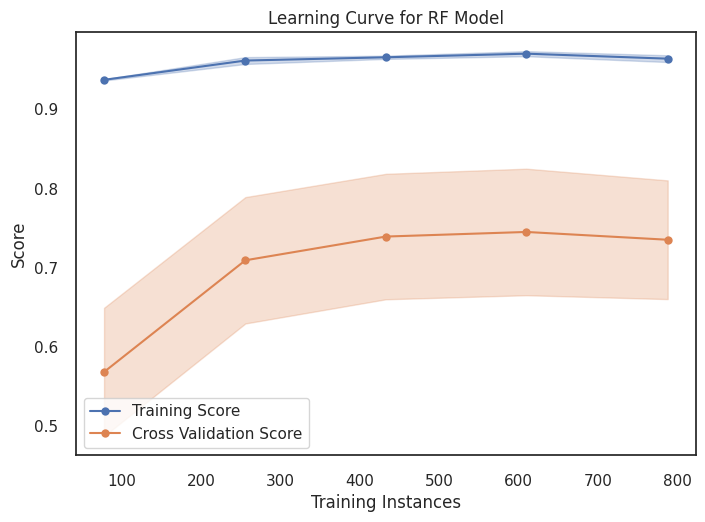

<Axes: title={'center': 'Learning Curve for RF Model'}, xlabel='Training Instances', ylabel='Score'>

In [83]:
from yellowbrick.model_selection import learning_curve

visualizer = learning_curve(rfmodel,xsc,y,cv=5, scoring='r2', title="Learning Curve for RF Model")

visualizer.show()

**Residuals plot + Q-Q plot (yellowbrick) for RF model**

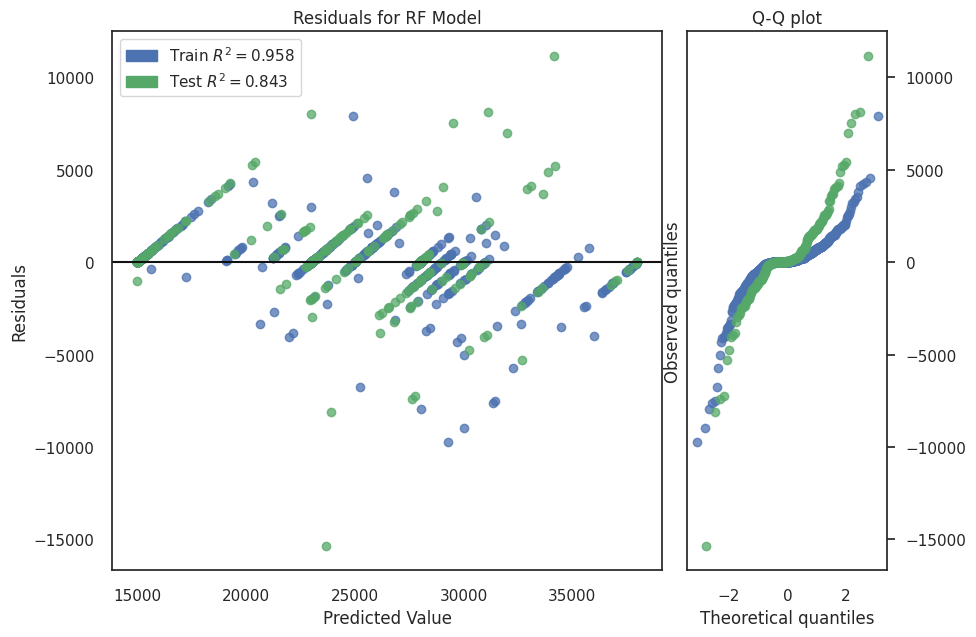

In [84]:
fig, ax = plt.subplots(figsize=(10, 7))
_ = residuals_plot(estimator=rfmodel,
                   is_fitted=True,
                   ax=ax,
                   X_train=xtrain,
                   y_train=ytrain,
                   X_test=xtest,
                   y_test=ytest,
                   hist=False,
                   qqplot=True,
                  title="Residuals for RF Model"
                  )

**Prediction error plot (yellowbrick) for RF model**

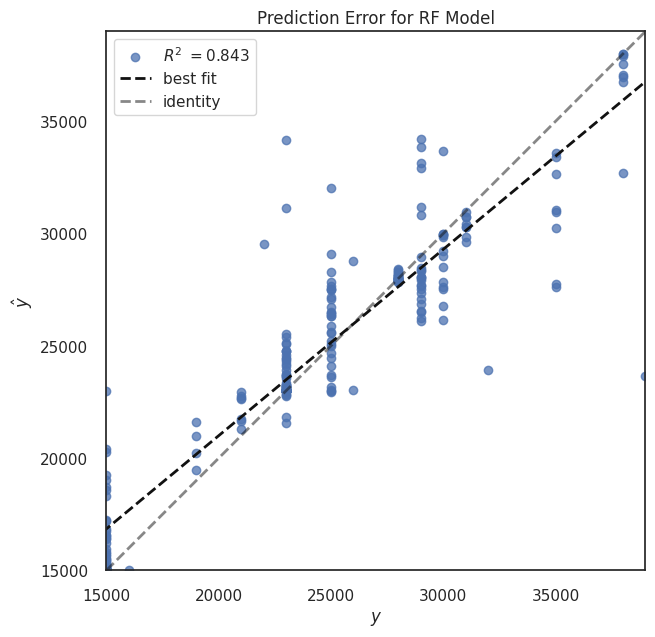

In [85]:
fig, ax = plt.subplots(figsize=(10, 7))
_ = prediction_error(estimator=rfmodel,
                     is_fitted=True,
                     ax=ax,
                     X_train=xtrain,
                     y_train=ytrain,
                     X_test=xtest,
                     y_test=ytest,
                     title="Prediction Error for RF Model")

**SHAP Analysis for RF model**

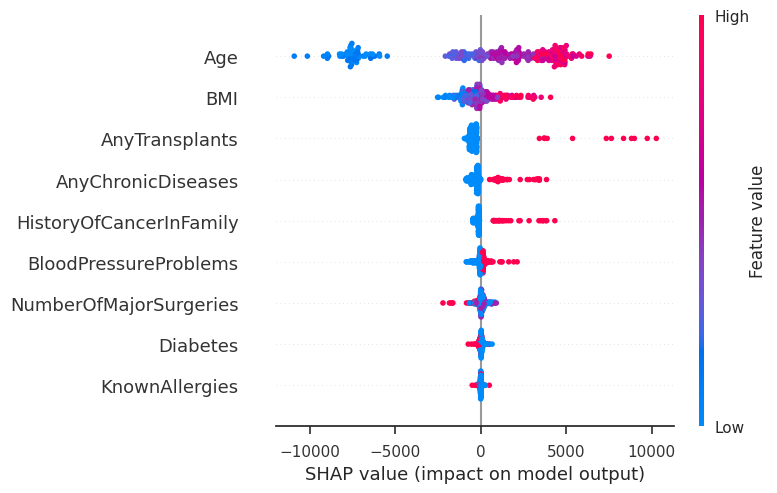

In [89]:
# Shap analysis for RF model

explainer1 = shap.TreeExplainer(rfmodel0)
RF_shap_values = explainer1.shap_values(xtest)
shap.summary_plot(RF_shap_values, xtest)

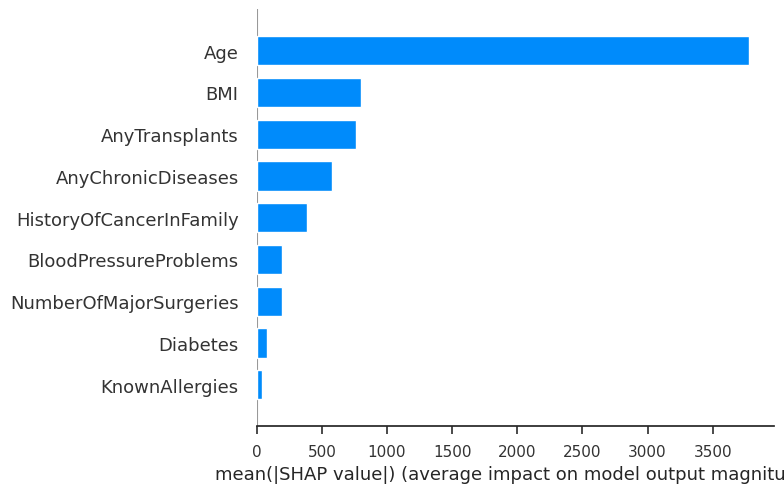

In [90]:
shap.summary_plot(RF_shap_values, xtest, plot_type="bar")

In [91]:
xtest.columns

Index(['Age', 'NumberOfMajorSurgeries', 'AnyChronicDiseases',
       'HistoryOfCancerInFamily', 'AnyTransplants', 'BMI',
       'BloodPressureProblems', 'Diabetes', 'KnownAllergies'],
      dtype='object')

**ICE plot for RF Model**

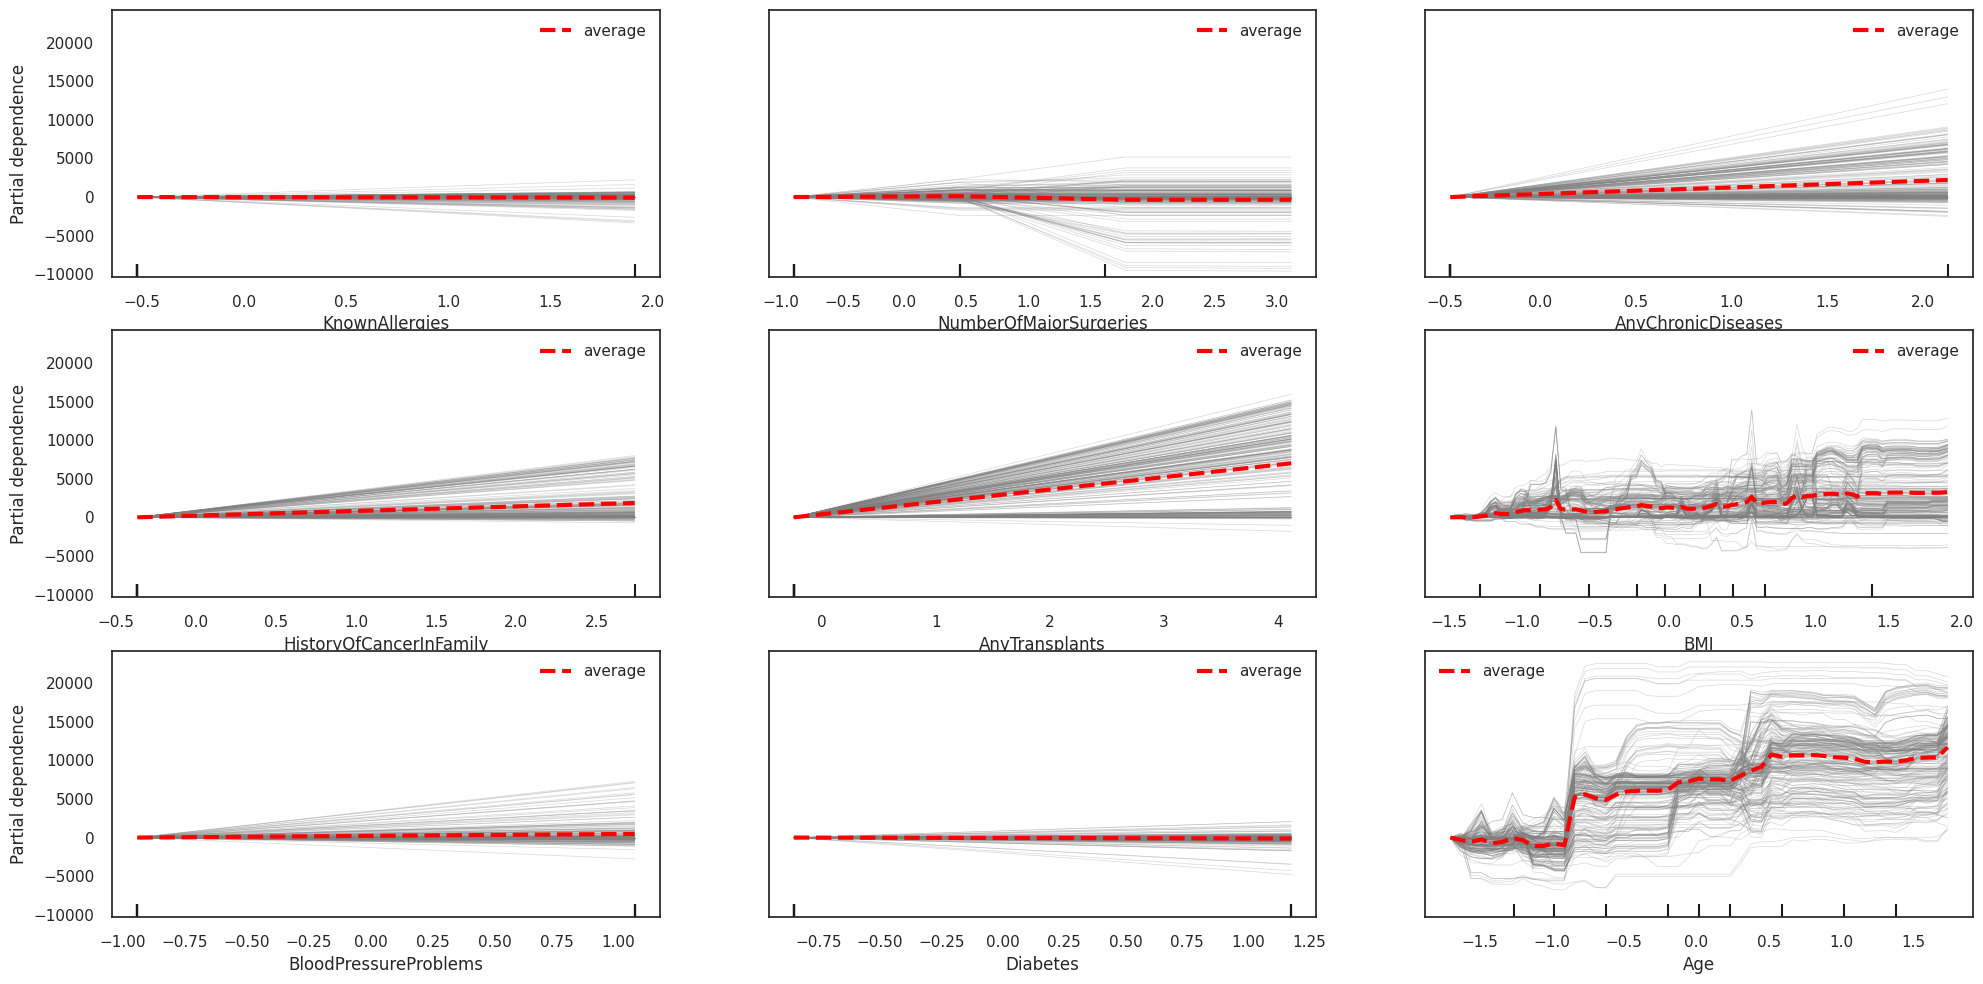

In [92]:
cols = xtest.columns
# Determine the 9 features with highest value for "feature importance" to draw the ICE plots.
included_features_indices = np.argpartition(rfmodel0.feature_importances_, -9)[-9:]

# Plot the ICE plots.
fig, ax = plt.subplots(figsize=(20, 10))
fig.set_tight_layout(True)  # Make sure labels of axes don't overlap in the final figure.
_ = PartialDependenceDisplay.from_estimator(estimator=rfmodel0,
                                            ax=ax,
                                            X=xtest,
                                            features=[i for i in included_features_indices],
                                            feature_names=cols,
                                            n_cols=3,
                                            centered= True,
                                            kind='both',
                                            ice_lines_kw={'color': 'gray'},
                                            pd_line_kw={'color': 'red', 'linewidth': 3, 'linestyle': 'dashed'})

# GBM Model

In [93]:
import time
import psutil

# Record the start time
start_time = time.time()
# Function to get memory usage
def get_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss / (1024 * 1024)  # Convert to megabytes

# Record memory usage before running your code
start_memory = get_memory_usage()

gbmodel0=GradientBoostingRegressor()
gbmodel0.fit(xtrain,ytrain)
ypredtrain3=gbmodel0.predict(xtrain)
ypredtest3=gbmodel0.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel0,xsc,y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50,100],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid2=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid2.fit(xtrain,ytrain)
print(grid2.best_params_)

gbmodel=grid2
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)

acc_GBM_Train = (r2_score(ytrain,ypredtrain3))
print('R^2 Train:', acc_GBM_Train)

acc_GBM_Test = (r2_score(ytest,ypredtest3))
print('R^2 Test:', acc_GBM_Test)

acc_GBM_CV = cross_val_score(gbmodel,xsc,y,cv=5,).mean()
print('R^2 CV:', acc_GBM_CV)


# other metrics

MAE_GBM_Test= metrics.mean_absolute_error(ytest,ypredtest3)
print('MAE:',MAE_GBM_Test)
MSE_GBM_Test = metrics.mean_squared_error(ytest,ypredtest3)
print('MSE:',MSE_GBM_Test)
RMSE_GBM_Test = np.sqrt(metrics.mean_squared_error(ytest,ypredtest3))
print('RMSE:', RMSE_GBM_Test)
MAPE_GBM_Test= (metrics.mean_absolute_percentage_error(ytest,ypredtest3))
print('MAPE:',MAPE_GBM_Test)

# Record the end time
end_time = time.time()

# Record memory usage after running your code
end_memory = get_memory_usage()

# Calculate and print the elapsed time
GBM_elapsed_time = end_time - start_time

# Calculate and print memory usage
GBM_memory_used = end_memory - start_memory

print(f"Elapsed Time: {GBM_elapsed_time} seconds")

print(f"Memory Used: {GBM_memory_used} MB")

0.8635682469956296
0.8415625632676188
0.7255832136379217
{'learning_rate': 0.19, 'n_estimators': 19}
R^2 Train: 0.7984206272561922
R^2 Test: 0.8505316289594775
R^2 CV: 0.7302513849539167
MAE: 1712.3898946813124
MSE: 5501133.797117239
RMSE: 2345.4495938129303
MAPE: 0.07139001493793921
Elapsed Time: 68.0526704788208 seconds
Memory Used: 0.546875 MB


**Learning Curve for GBM model**

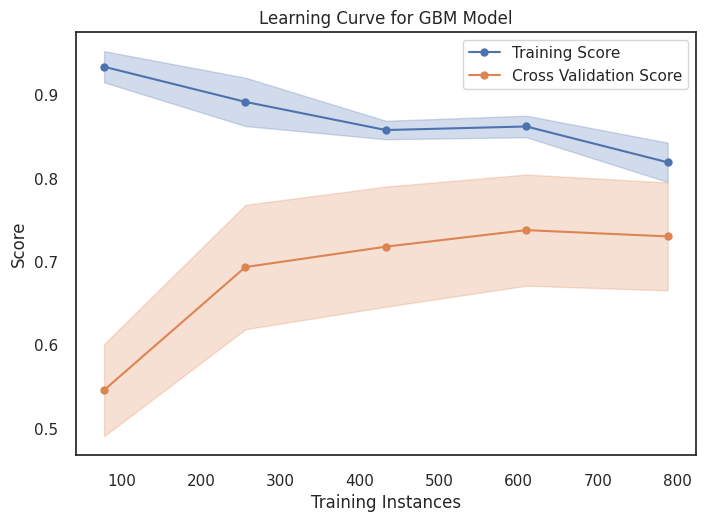

<Axes: title={'center': 'Learning Curve for GBM Model'}, xlabel='Training Instances', ylabel='Score'>

In [94]:
from yellowbrick.model_selection import learning_curve

visualizer = learning_curve(gbmodel,xsc,y,cv=5, scoring='r2', title="Learning Curve for GBM Model")

visualizer.show()

**Residuals plot + Q-Q plot (yellowbrick) for GBM model**

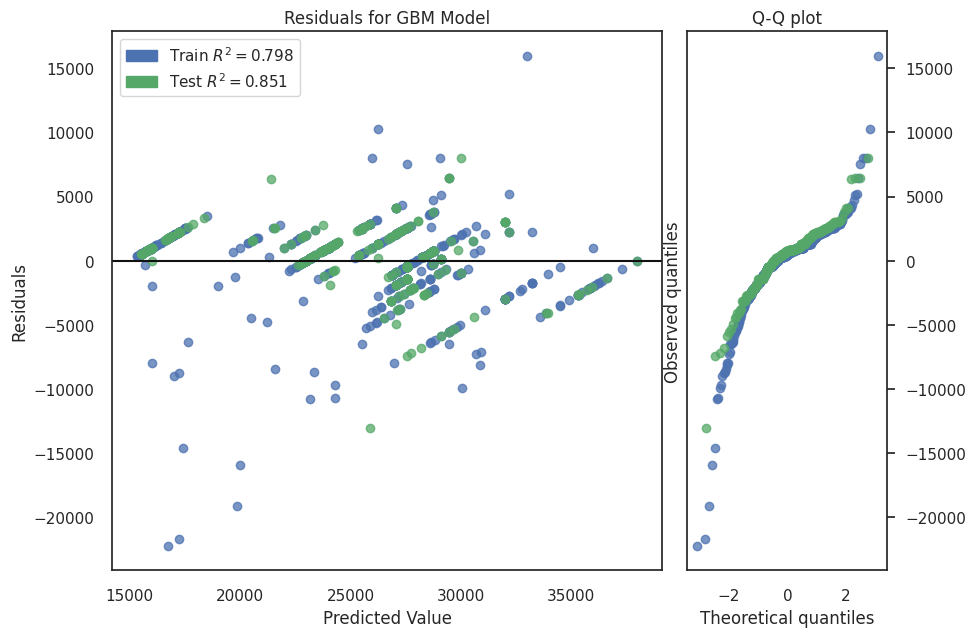

In [95]:
fig, ax = plt.subplots(figsize=(10, 7))
_ = residuals_plot(estimator=gbmodel,
                   is_fitted=True,
                   ax=ax,
                   X_train=xtrain,
                   y_train=ytrain,
                   X_test=xtest,
                   y_test=ytest,
                   hist=False,
                   qqplot=True,
                  title="Residuals for GBM Model"
                  )

**Prediction error plot (yellowbrick) for GBM model**

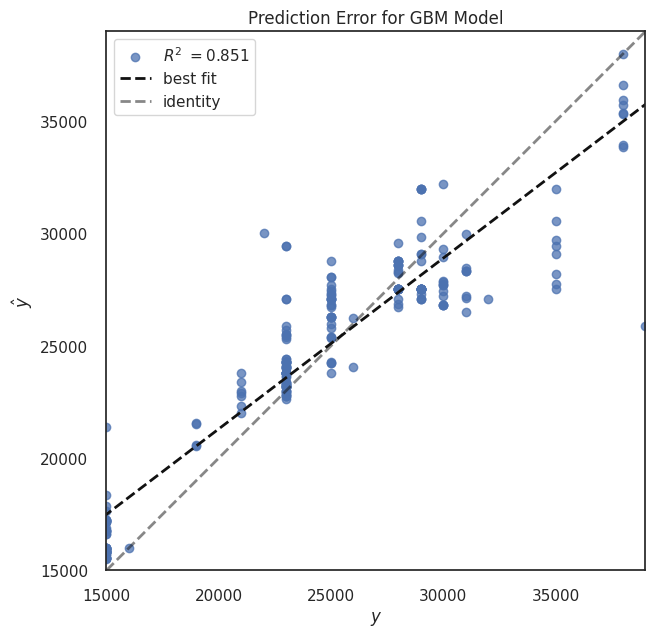

In [96]:
fig, ax = plt.subplots(figsize=(10, 7))
_ = prediction_error(estimator=gbmodel,
                     is_fitted=True,
                     ax=ax,
                     X_train=xtrain,
                     y_train=ytrain,
                     X_test=xtest,
                     y_test=ytest,
                     title="Prediction Error for GBM Model")

**SHAP Analysis for GBM model**

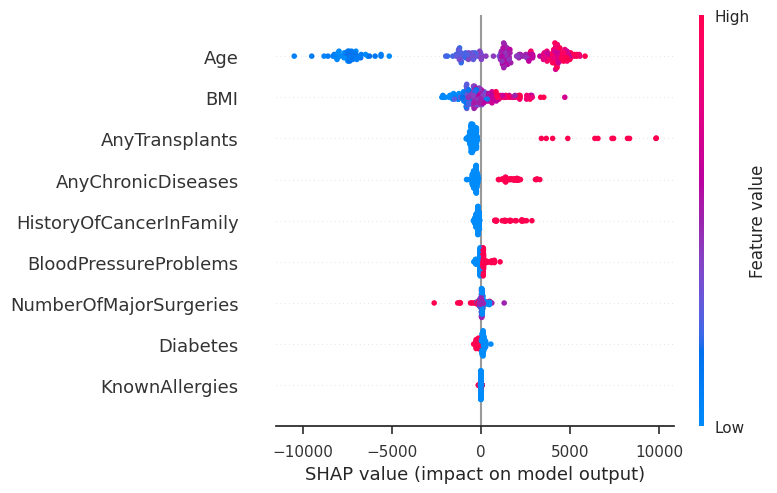

In [97]:
# Shap analysis for RF model
explainer2 = shap.TreeExplainer(gbmodel0)
GBM_shap_values = explainer2.shap_values(xtest)
shap.summary_plot(GBM_shap_values, xtest)

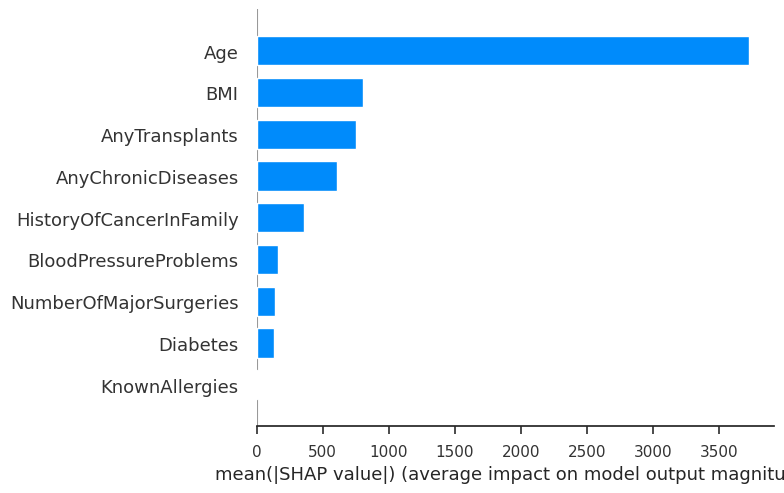

In [98]:
shap.summary_plot(GBM_shap_values, xtest, plot_type="bar")

**ICE plot for GBM Model**

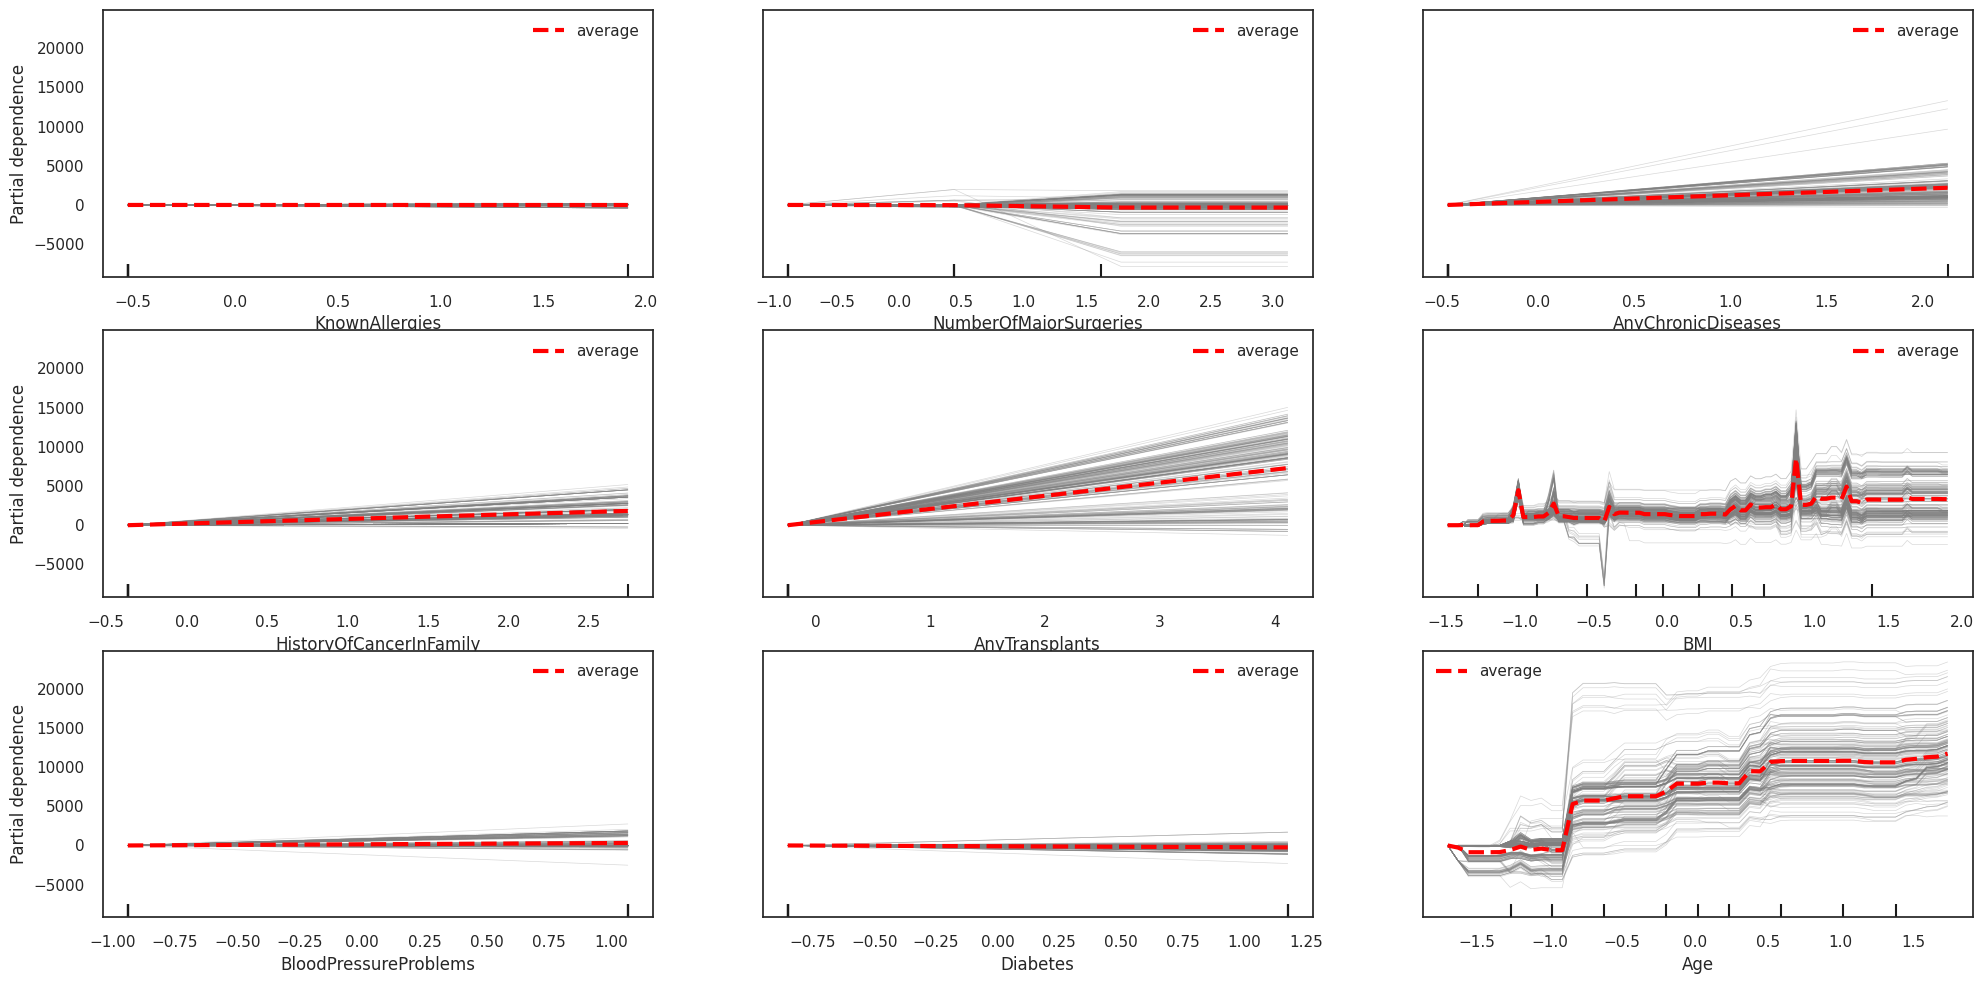

In [99]:
cols = xtest.columns
# Determine the 9 features with highest value for "feature importance" to draw the ICE plots.
included_features_indices = np.argpartition(gbmodel0.feature_importances_, -9)[-9:]

# Plot the ICE plots.
fig, ax = plt.subplots(figsize=(20, 10))
fig.set_tight_layout(True)  # Make sure labels of axes don't overlap in the final figure.
_ = PartialDependenceDisplay.from_estimator(estimator=gbmodel0,
                                            ax=ax,
                                            X=xtest,
                                            features=[i for i in included_features_indices],
                                            feature_names=cols,
                                            centered= True,
                                            n_cols=3,
                                            kind='both',
                                            ice_lines_kw={'color': 'gray'},
                                            pd_line_kw={'color': 'red', 'linewidth': 3, 'linestyle': 'dashed'})

**Comparing scores of the Models Used**

In [102]:
models = pd.DataFrame({
    'Model': ['LR Model', 'SVM Model', 'RF Model', 'GBM Model'],
    'Train Score': [acc_lr_Train*100, acc_SVM_Train*100, acc_RF_Train*100, acc_GBM_Train*100],
    'Test Score': [acc_lr_Test*100, acc_SVM_Test*100, acc_RF_Test*100, acc_GBM_Test*100],
    'CV Score': [acc_lr_CV*100, acc_SVM_CV*100, acc_RF_CV*100, acc_GBM_CV*100],
})
models.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score,CV Score
3,GBM Model,79.842,85.053,73.025
2,RF Model,95.828,84.298,73.428
0,LR Model,61.120,70.857,62.556
1,SVM Model,-3.541,-2.850,-3.334


In [103]:
models = pd.DataFrame({
    'Model': ['RF Model', 'GBM Model'],
    'Train Score (R2)': [acc_RF_Train*100, acc_GBM_Train*100],
    'Test Score (R2)': [acc_RF_Test*100, acc_GBM_Test*100],
    'CV Score (R2)': [acc_RF_CV*100, acc_GBM_CV*100],
    'MAE Score': [MAE_RF_Test, MAE_GBM_Test],
    'RMSE Score': [RMSE_RF_Test, RMSE_GBM_Test],
    'MAPE Score (%)': [MAPE_RF_Test*100, MAPE_GBM_Test*100],
    'Elapsed Time (Sec)': [RF_elapsed_time, GBM_elapsed_time],
    'Memory Used (MB)': [RF_memory_used, GBM_memory_used],
})
models.sort_values(by='Test Score (R2)', ascending=False)

,Model,Train Score (R2),Test Score (R2),CV Score (R2),MAE Score,RMSE Score,MAPE Score (%),Elapsed Time (Sec),Memory Used (MB)
1,GBM Model,79.842,85.053,73.025,1712.390,2345.450,7.139,68.053,0.547
0,RF Model,95.828,84.298,73.428,1371.844,2403.975,5.777,55.050,0.258


# Conclusion

We can use the XGBoost model as well. While it can outperform many other models in several factors, it is computationally expensive and requires considerable computational resources to run.








# Actionable Business Insights

1. **Age and Premium Price**

**Insight**: Age is a significant factor in determining insurance premiums. As age increases, so does the premium price. This is consistent with the belief that older individuals are at a higher risk of health problems.

**Action**: Create age-specific insurance packages that offer tailored benefits for different age groups. Consider offering discounts or special plans for younger individuals to attract a broader customer base while maintaining higher premiums for older individuals to account for increased risk.

2. **Impact of Transplants and Chronic Diseases**

**Insight**: Users with a history of transplants or chronic diseases pay significantly higher premiums. These conditions indicate higher health risks and potential future claims.

**Action**: Develop targeted health management programs for users with transplants and chronic diseases. Offer personalized health plans that include regular check-ups and preventive care to help manage their conditions and potentially reduce claims.

3. **Weight and Premium Price**

**Insight**: There is a positive relationship between weight and premium price, although some anomalies exist. Overweight and obese individuals tend to have higher premiums due to increased health risks.

**Action**: Implement wellness programs focused on weight management. Offer incentives for policyholders to maintain a healthy weight, such as premium discounts for meeting specific health goals or participating in fitness programs.

4. **History of Cancer in Family**

**Insight**: Users with a family history of cancer tend to pay higher premiums. This indicates a perceived higher risk of developing cancer.

**Action**: Provide cancer-specific insurance policies that offer comprehensive coverage for early detection, treatment, and support. Consider offering genetic testing services to assess individual risk and personalize insurance plans accordingly.

5. **Number of Major Surgeries**

**Insight**: Users who have undergone multiple major surgeries pay higher premiums, indicating higher health risks and potential future medical expenses.

**Action**: Offer post-surgery recovery and rehabilitation support programs. These programs can help users recover faster and reduce the likelihood of further surgeries, potentially lowering overall healthcare costs.

6. **Height and Premium Price**

**Insight**: Height, when considered along with weight (BMI), can influence premium prices. A higher BMI typically results in higher premiums.

**Action**: Educate policyholders about the importance of maintaining a healthy BMI. Provide access to nutritional counseling and fitness resources to help users achieve and maintain a healthy BMI.




***Insignificant Factors***




1. **Known Allergies, Blood Pressure Problems, and Diabetes**

**Insight**: Known allergies, blood pressure problems, and diabetes have been identified as having an insignificant or minimal impact on premium prices in the current analysis.

**Action**: While these factors might not significantly influence premiums, continue monitoring these conditions as they could still impact health and claims over time. Consider offering educational resources and self-management tools to help policyholders manage these conditions effectively.




# *Model Findings and Business Strategy*




**Model Performance**


**GBM Model**: Best overall performance with high test and CV scores. It is reliable for predicting insurance premiums.

**RF Model**: Excellent training score but slightly lower test and CV scores compared to GBM. Robust and interpretable.

**LR Model and SVM Model**: Lower performance, especially SVM with negative scores, indicating poor fit for this problem.

**Strategy**


**Prioritize GBM and RF Models**: Focus on using these models for predicting insurance premiums due to their higher accuracy and reliability.

**Data Enhancement**: Collect more data to improve model performance and capture additional factors influencing premiums. Larger datasets can help in better understanding and reducing anomalies.

By leveraging these insights and strategies, insurance companies can refine their pricing models, develop targeted interventions, and offer more personalized and competitive insurance products, ultimately leading to improved customer satisfaction and better risk management.